In [2]:
from utils import randInitializeWeights, Unroll_weights, Train_network
from utils import Tanh, TanhGradient, sigmoidGradient,sigmoid, ReLu, ReLuGradient, Load_data, display_data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read and Display Dataset

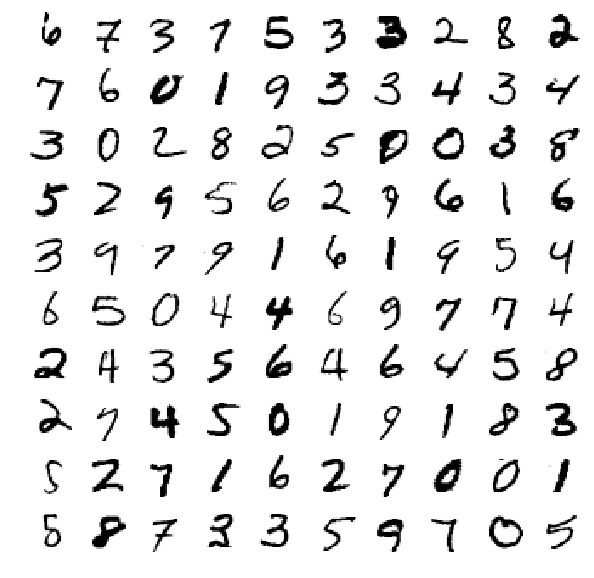

In [4]:
train_file_path = './digitstrain.txt'
val_file_path = './digitsvalid.txt'
test_file_path = './digitstest.txt'
# ---------------Load & Visualize the training data------------------------
X_train, Y_train = Load_data(train_file_path)
X_val, Y_val = Load_data(val_file_path)
X_test, Y_test = Load_data(test_file_path)
display_data(X_train)

## Try Tanh activation

In [358]:
#-------------------------------Network Architecture-----------------------
n_hidden=1
input_layer_size=784
hidden_layer_size=[100]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)

# ----------------------------- Initializing Params------------------------
nn_weight_list = []
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)

""" The parameters for the neural network are "unrolled" into the vector nn_params
and need to be converted back into the weight matrices"""
nnparams = Unroll_weights(nn_weight_list, layer_sizes)

#------------------------------ Hyper Parameters ----------------------------
epochmax = 100
LearningRate = 0.005
reg_lambda = 0.01
minibatchsize = 20            #Set =1 for regular stochastic gradient descent
momentum = 0.5
# -------------------------Set Activation Function----------------------------
activ_func = Tanh
activ_Grad_func = TanhGradient

# ----------------------------Training Network--------------------------------
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, layer_sizes, minibatchsize, momentum,  activ_func, activ_Grad_func, X_train, Y_train, X_val, Y_val)

Time 0
Cross Entropy 	 Training:  0.657330005379 	 Validation:  0.795388125418
Mean  Error : 	 Training:  0.113 	 Validation: 0.151
Time 10
Cross Entropy 	 Training:  0.11123706813 	 Validation:  0.53747584249
Mean  Error : 	 Training:  0.00666666666667 	 Validation: 0.104
Time 20
Cross Entropy 	 Training:  0.0430486013824 	 Validation:  0.500841622106
Mean  Error : 	 Training:  0.0 	 Validation: 0.092
Time 30
Cross Entropy 	 Training:  0.0320733061804 	 Validation:  0.486142329613
Mean  Error : 	 Training:  0.0 	 Validation: 0.085
Time 40
Cross Entropy 	 Training:  0.0287788477583 	 Validation:  0.485851387549
Mean  Error : 	 Training:  0.0 	 Validation: 0.085
Time 50
Cross Entropy 	 Training:  0.0260786832418 	 Validation:  0.478684218603
Mean  Error : 	 Training:  0.0 	 Validation: 0.085
Time 60
Cross Entropy 	 Training:  0.0251035777422 	 Validation:  0.482103260046
Mean  Error : 	 Training:  0.0 	 Validation: 0.085
Time 70
Cross Entropy 	 Training:  0.0246534221744 	 Validation:  

('epochmax:100', ' L2 Regularization: 0.010', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 10])
Train 0.0242084127361 0.0
Val 0.473237372069 0.086
Test 0.563372169918 0.095
Test Performance is 90.5 %


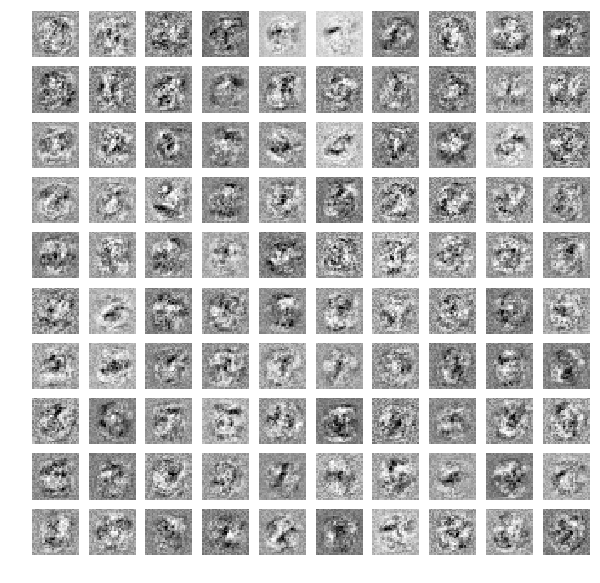

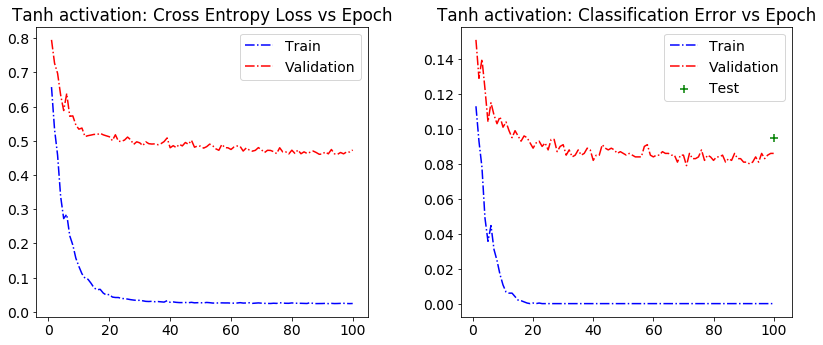

In [362]:
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

# ---------------Plotting Results------------------------
print "Test Performance is", 100.0*(1-mean_err),'%'

matplotlib.rcParams.update({'font.size': 14})
time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.savefig('TanhH_features.png',dpi = 200)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Tanh activation: Cross Entropy Loss vs Epoch')

plt.subplot(122)
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Tanh activation: Classification Error vs Epoch')
plt.tight_layout()
plt.show()

# Try ReLu activation

In [363]:
#-------------------------------Network Architecture-----------------------
n_hidden=1
input_layer_size=784
hidden_layer_size=[100]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)

# ----------------------------- Initializing Params------------------------
nn_weight_list = []
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)

""" The parameters for the neural network are "unrolled" into the vector nn_params
and need to be converted back into the weight matrices"""
nnparams = Unroll_weights(nn_weight_list, layer_sizes)

#------------------------------ Hyper Parameters ----------------------------
epochmax = 100
LearningRate = 0.005
reg_lambda = 0.01
minibatchsize = 20 #Set =1 for regular stochastic gradient descent
momentum = 0.5

# -------------------------Set Activation Function----------------------------
activ_func = ReLu
activ_Grad_func = ReLuGradient

#-------------------------------Training Network------------------------------
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, layer_sizes, minibatchsize, momentum,  activ_func, activ_Grad_func, X_train, Y_train, X_val, Y_val)



Time 0
Cross Entropy 	 Training:  0.693414154483 	 Validation:  0.83635172474
Mean  Error : 	 Training:  0.128333333333 	 Validation: 0.166
Time 10
Cross Entropy 	 Training:  0.0601694043149 	 Validation:  0.466202818143
Mean  Error : 	 Training:  0.002 	 Validation: 0.083
Time 20
Cross Entropy 	 Training:  0.0253426503116 	 Validation:  0.446034752815
Mean  Error : 	 Training:  0.0 	 Validation: 0.075
Time 30
Cross Entropy 	 Training:  0.0223879770071 	 Validation:  0.425856189887
Mean  Error : 	 Training:  0.0 	 Validation: 0.075
Time 40
Cross Entropy 	 Training:  0.020098607408 	 Validation:  0.42137794664
Mean  Error : 	 Training:  0.0 	 Validation: 0.077
Time 50
Cross Entropy 	 Training:  0.0191279719176 	 Validation:  0.419958505992
Mean  Error : 	 Training:  0.0 	 Validation: 0.072
Time 60
Cross Entropy 	 Training:  0.0187865068059 	 Validation:  0.420111793019
Mean  Error : 	 Training:  0.0 	 Validation: 0.074
Time 70
Cross Entropy 	 Training:  0.01859644653 	 Validation:  0.40

('epochmax:100', ' L2 Regularization: 0.010', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 10])
Train 0.0182600491068 0.0
Val 0.413749108018 0.074
Test 0.484637078573 0.0786666666667
Test Performance is 92.1333333333 %


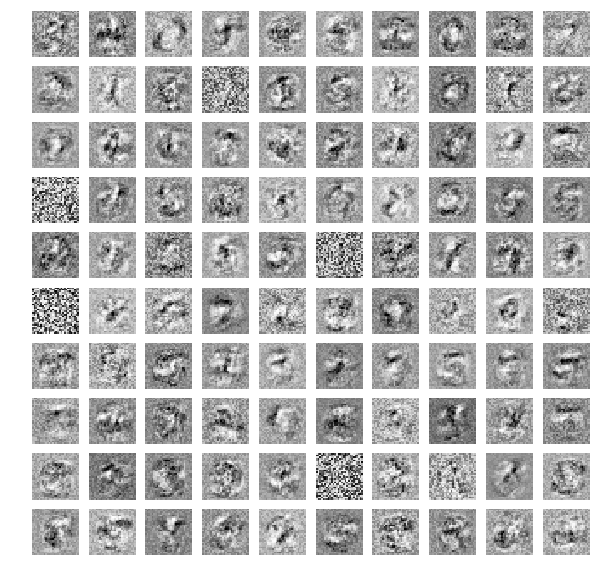

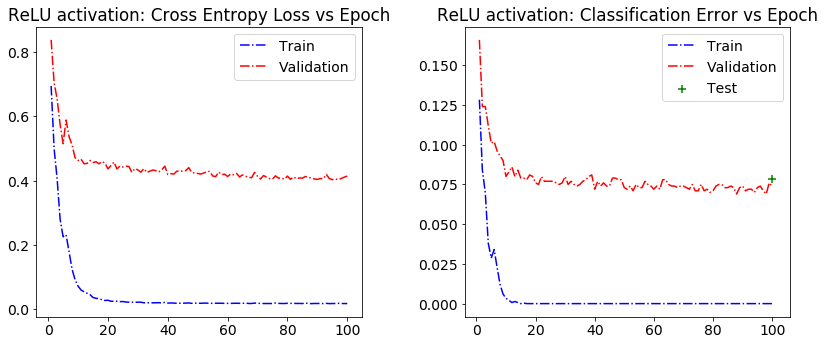

In [365]:
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

# ---------------Plotting Results------------------------
print "Test Performance is", 100.0*(1-mean_err),'%'

matplotlib.rcParams.update({'font.size': 14})
time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.savefig('RELU_features.png',dpi = 200)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('ReLU activation: Cross Entropy Loss vs Epoch')

plt.subplot(122)
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('ReLU activation: Classification Error vs Epoch')
plt.tight_layout()
plt.savefig('ReLU_entropy.png',dpi=150)
plt.show()

## Run Combinations of learning rate and momentum 

In [55]:
def Save_results(train_cost, val_cost, err_tr, err_val, nn_weight_list, layer_sizes, activ_func, X_test, Y_test, LearningRate,momentum):
    print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
      ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

    # ---------------Plotting Results------------------------
    print ' Learning rate: {:1.2f}'.format(LearningRate),'Momentum : {:1.1f}'.format(momentum) 
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_test,output_p)
    print "Test Performance is", 100.0*(1-mean_err),'%'
    
    time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(time,train_cost,'b-.')
    plt.plot(time,val_cost,'r-.')
    plt.legend(['Train','Validation'])
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('e: {:1.2f}'.format(LearningRate) + 'Momentum : {:1.1f}'.format(momentum))

    plt.subplot(122)
    plt.plot(time,err_tr,'b-.')
    plt.plot(time,err_val,'r-.')
    plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
    plt.legend(['Train','Validation','Test'])
    plt.ylabel('Classification Error')
    plt.xlabel('Epoch')
    plt.title('e: {:1.2f}'.format(LearningRate) + 'Momentum : {:1.1f}'.format(momentum))
    plt.tight_layout()
    plt.savefig('LR{:1.2f}'.format(LearningRate) + 'Momentum{:1.1f}'.format(momentum)+'.png',dpi = 150)
    
    #Save everything
def Combination(LearningRate,momentum):
    # --------------- Initializing Params------------------------
    n_hidden=1
    input_layer_size=784
    hidden_layer_size=[100]
    num_labels = 10
    layer_sizes=[input_layer_size]
    layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
    layer_sizes.append(num_labels)
    # Initialize weights for all the layers:
    nn_weight_list = []
    for i in range(len(layer_sizes)-1):
        L_in = layer_sizes[i]
        L_out = layer_sizes[i+1]
        np.random.seed(0)
        W = randInitializeWeights(L_in, L_out) #(100, 785)
        nn_weight_list.append(W)
    """ The parameters for the neural network are "unrolled" into the vector nn_params
    and need to be converted back into the weight matrices"""
    nnparams = Unroll_weights(nn_weight_list, layer_sizes)
    # ---------------Training Network------------------------
    epochmax = 200
    reg_lambda = 0.01
    minibatchsize = 40 #Set =1 for regular stochastic gradient descent


    activ_func = sigmoid
    activ_Grad_func = sigmoidGradient
    train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                          layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                          activ_Grad_func, X_train, Y_train, X_val, Y_val)
    Save_results(train_cost, val_cost, err_tr, err_val, nn_weight_list, layer_sizes, activ_func, X_test, Y_test, LearningRate,
                 momentum)

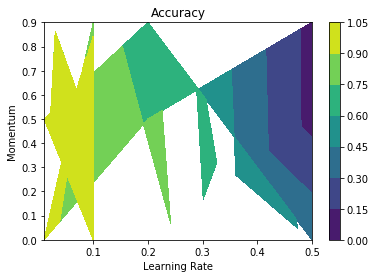

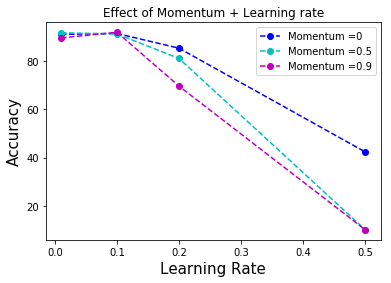

In [93]:
list1 =[(0.1,0),(0.1,0.5),(0.1,0.9),(0.01,0),(0.01,0.5),(0.01,0.9),(0.2,0),(0.2,0.5),(0.2,0.9),(0.5,0),(0.5,0.5),(0.5,0.9)]
lr = np.array([x[0] for x in list1]).reshape((3,4))
mom = np.array([x[1] for x in list1]).reshape((3,4))
Test_acc = 0.01*np.array([91.1667, 91.833,89.7, 91.5667, 91.3667, 92.0667,85.433, 81.1667, 69.667, 42.333, 10.0, 10.0]).reshape((3,4))
cset = plt.contourf(lr,mom,Test_acc)
plt.ylabel('Momentum')
plt.xlabel("Learning Rate")
plt.colorbar(cset)
plt.title('Accuracy')
#plt.savefig('MomLR.png',dpi=150)

plt.figure()
plt.plot([0.01,0.1,0.2,0.5],[91.1667,91.5667,85.433,42.333],'--bo')
plt.plot([0.01,0.1,0.2,0.5],[91.833,91.3667,81.1667,10.0],'--co')
plt.plot([0.01,0.1,0.2,0.5],[89.7, 92.0667, 69.667,10.0],'--mo')
plt.legend(['Momentum =0','Momentum =0.5','Momentum =0.9'])
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel("Learning Rate", fontsize=15)
plt.title('Effect of Momentum + Learning rate')

('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.10', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.10 Momentum : 0.0
Test Performance is 91.1666666667 %
('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.10', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.10 Momentum : 0.5
Test Performance is 91.8333333333 %
('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.10', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.10 Momentum : 0.9
Test Performance is 89.7 %
('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.01 Momentum : 0.0
Test Performance is 91.5666666667 %
('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.01 Momentum : 0.5
Test Performance is 91.3666666667 %
('epochmax:200', ' L2 Regularization: 0.010', ' Learning rate: 0.01', ' Layer Sizes', [784, 100, 10])
 Learning rate: 0.01 Momentum : 0.9
T

/Users/Ankita/Desktop/ipython/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:97: RuntimeWarning: overflow encountered in exp


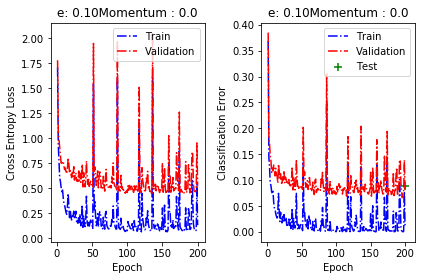

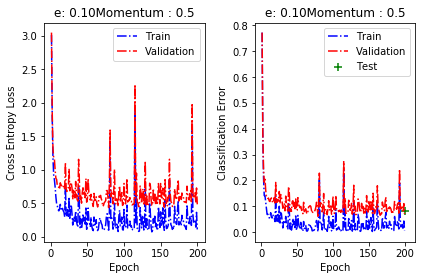

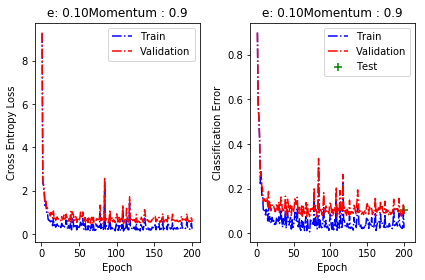

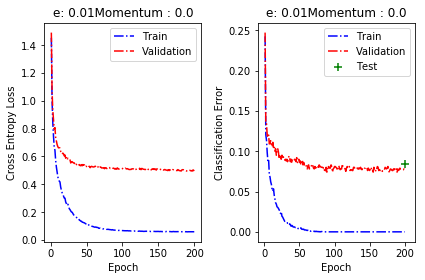

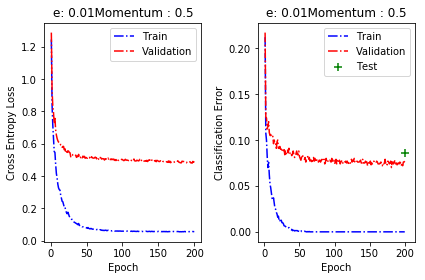

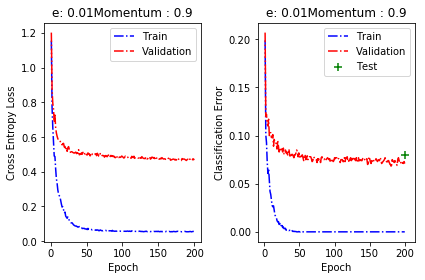

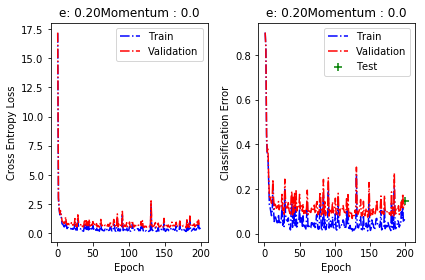

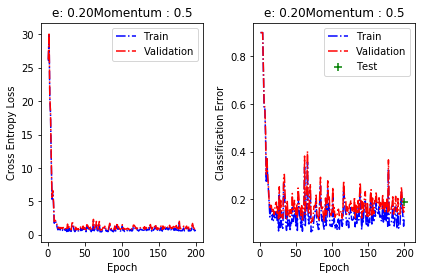

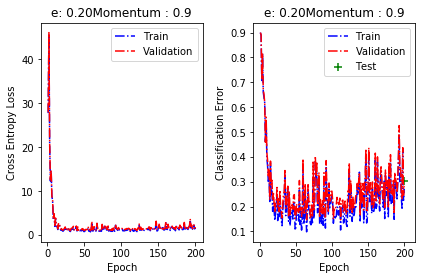

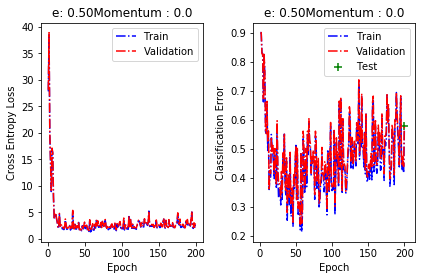

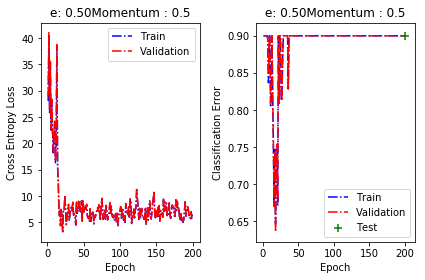

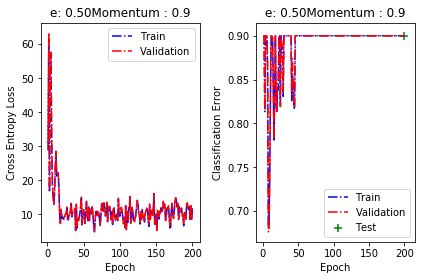

In [56]:
for lr,mom in [(0.1,0),(0.1,0.5),(0.1,0.9),(0.01,0),(0.01,0.5),(0.01,0.9),(0.2,0),(0.2,0.5),(0.2,0.9),(0.5,0),(0.5,0.5),(0.5,0.9)]:
    Combination(lr,mom)

 Layer Sizes [784, 20, 10]
Train Performance is 99.5666666667 %
Val Performance is 89.8 %
Test Performance is 87.6333333333 %
 Layer Sizes [784, 200, 10]
Train Performance is 100.0 %
Val Performance is 92.4 %
Test Performance is 91.7 %
 Layer Sizes [784, 100, 10]
Train Performance is 100.0 %
Val Performance is 92.2 %
Test Performance is 91.3 %
 Layer Sizes [784, 500, 10]
Train Performance is 100.0 %
Val Performance is 92.1 %
Test Performance is 91.4 %


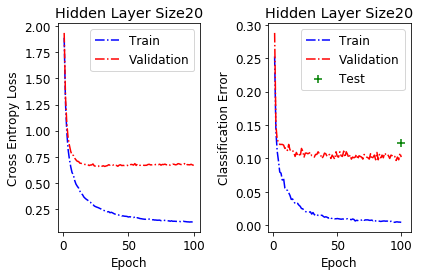

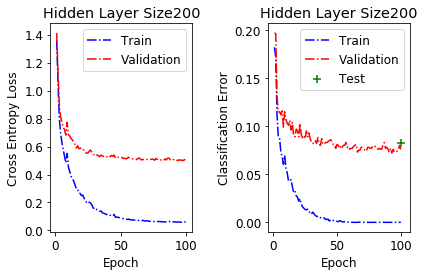

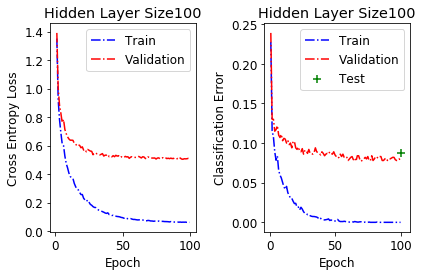

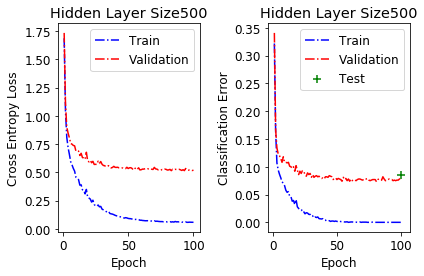

In [171]:
matplotlib.rcParams.update({'font.size': 12})
def Save_results1(train_cost, val_cost, err_tr, err_val, nn_weight_list, layer_sizes, activ_func, X_test, Y_test):
    
    print ' Layer Sizes',layer_sizes

    # ---------------Plotting Results------------------------
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_train,output_p)
    print "Train Performance is", 100.0*(1-mean_err),'%'
    
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_val,output_p)
    print "Val Performance is", 100.0*(1-mean_err),'%'
    
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_test,output_p)
    print "Test Performance is", 100.0*(1-mean_err),'%'
    

    time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
    
    plt.figure()
    plt.subplot(121)
    plt.plot(time,train_cost,'b-.')
    plt.plot(time,val_cost,'r-.')
    plt.legend(['Train','Validation'])
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Hidden Layer Size'+str(layer_sizes[1]))

    plt.subplot(122)
    plt.plot(time,err_tr,'b-.')
    plt.plot(time,err_val,'r-.')
    plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
    plt.legend(['Train','Validation','Test'])
    plt.ylabel('Classification Error')
    plt.xlabel('Epoch')
    plt.title('Hidden Layer Size'+str(layer_sizes[1]))
    plt.tight_layout()
    plt.savefig('Hidden Layer Size'+str(layer_sizes[1])+'.png',dpi = 150)
    
    
hidden_units = [20,200,100,500]
for h in hidden_units:
    # --------------- Initializing Params------------------------
    n_hidden=1
    input_layer_size=784
    hidden_layer_size=[h]
    num_labels = 10
    layer_sizes=[input_layer_size]
    layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
    layer_sizes.append(num_labels)
    # Initialize weights for all the layers:
    nn_weight_list = []
    for i in range(len(layer_sizes)-1):
        L_in = layer_sizes[i]
        L_out = layer_sizes[i+1]
        np.random.seed(0)
        W = randInitializeWeights(L_in, L_out) #(100, 785)
        nn_weight_list.append(W)
    """ The parameters for the neural network are "unrolled" into the vector nn_params
    and need to be converted back into the weight matrices"""
    nnparams = Unroll_weights(nn_weight_list, layer_sizes)
    # ---------------Training Network------------------------
    epochmax = 100
    reg_lambda = 0.01
    minibatchsize = 40 #Set =1 for regular stochastic gradient descent
    LearningRate= 0.01
    momentum = 0.2

    activ_func = sigmoid
    activ_Grad_func = sigmoidGradient
    train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                          layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                          activ_Grad_func, X_train, Y_train, X_val, Y_val)
    Save_results1(train_cost, val_cost, err_tr, err_val, nn_weight_list, layer_sizes, activ_func, X_test, Y_test)

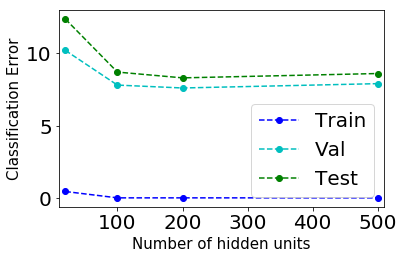

In [169]:
plt.plot([20,100,200,500],100-np.array([99.56, 100,100,100]),'--bo')
plt.plot([20,100,200,500],100-np.array([ 89.8, 92.2,92.4,92.1]),'--co')
plt.plot([20,100,200,500],100-np.array([87.63,91.3,91.7,91.4]),'--go')

plt.legend(['Train','Val','Test'])
plt.xlabel('Number of hidden units',fontsize=15)
plt.ylabel('Classification Error',fontsize=15)
plt.xlim([10,510])
plt.tight_layout()
plt.savefig('Hiddenunits.png')

# Run Gridsearch for 1 hidden layer parameter search

In [5]:
import itertools

L2reg = [0,0.01, 0.1]
learning_rates = [ 0.1, 0.01, 0.005]
momentums = [0, 0.1, 0.5]
epochs=[50,100]
hidden_units = [100,200,500]
I=0
for combination in itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units):
    print combination
    I=I+1
print I

(0, 0.1, 0, 50, 100)
(0, 0.1, 0, 50, 200)
(0, 0.1, 0, 50, 500)
(0, 0.1, 0, 100, 100)
(0, 0.1, 0, 100, 200)
(0, 0.1, 0, 100, 500)
(0, 0.1, 0.1, 50, 100)
(0, 0.1, 0.1, 50, 200)
(0, 0.1, 0.1, 50, 500)
(0, 0.1, 0.1, 100, 100)
(0, 0.1, 0.1, 100, 200)
(0, 0.1, 0.1, 100, 500)
(0, 0.1, 0.5, 50, 100)
(0, 0.1, 0.5, 50, 200)
(0, 0.1, 0.5, 50, 500)
(0, 0.1, 0.5, 100, 100)
(0, 0.1, 0.5, 100, 200)
(0, 0.1, 0.5, 100, 500)
(0, 0.01, 0, 50, 100)
(0, 0.01, 0, 50, 200)
(0, 0.01, 0, 50, 500)
(0, 0.01, 0, 100, 100)
(0, 0.01, 0, 100, 200)
(0, 0.01, 0, 100, 500)
(0, 0.01, 0.1, 50, 100)
(0, 0.01, 0.1, 50, 200)
(0, 0.01, 0.1, 50, 500)
(0, 0.01, 0.1, 100, 100)
(0, 0.01, 0.1, 100, 200)
(0, 0.01, 0.1, 100, 500)
(0, 0.01, 0.5, 50, 100)
(0, 0.01, 0.5, 50, 200)
(0, 0.01, 0.5, 50, 500)
(0, 0.01, 0.5, 100, 100)
(0, 0.01, 0.5, 100, 200)
(0, 0.01, 0.5, 100, 500)
(0, 0.005, 0, 50, 100)
(0, 0.005, 0, 50, 200)
(0, 0.005, 0, 50, 500)
(0, 0.005, 0, 100, 100)
(0, 0.005, 0, 100, 200)
(0, 0.005, 0, 100, 500)
(0, 0.005, 0.1, 50,

In [6]:
L2reg = [0,0.001,0.01,0.5]
learning_rates = [0.5, 0.1, 0.01, 0.005]
momentums = [0, 0.1, 0.5, 0.9]
epochs=[20,50,100]
hidden_units = [100,200,500]
minibatchsize = 40 #Set =1 for regular stochastic gradient descent
train_err= []
val_err = []
test_err=[]
#Final_params = []
for combination in itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units):
    reg_lambda, LearningRate, momentum, epochmax, h = combination
    # --------------- Initializing Params------------------------
    n_hidden=1
    input_layer_size=784
    hidden_layer_size=[h]
    num_labels = 10
    layer_sizes=[input_layer_size]
    layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
    layer_sizes.append(num_labels)
    # Initialize weights for all the layers:
    nn_weight_list = []
    for i in range(len(layer_sizes)-1):
        L_in = layer_sizes[i]
        L_out = layer_sizes[i+1]
        np.random.seed(0)
        W = randInitializeWeights(L_in, L_out) #(100, 785)
        nn_weight_list.append(W)
    """ The parameters for the neural network are "unrolled" into the vector nn_params
    and need to be converted back into the weight matrices"""
    nnparams = Unroll_weights(nn_weight_list, layer_sizes)
    # ---------------Training Network------------------------
    activ_func = sigmoid
    activ_Grad_func = sigmoidGradient
    train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                          layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                          activ_Grad_func, X_train, Y_train, X_val, Y_val)
    train_err.append(err_tr[-1])
    val_err.append(err_val[-1])
    #Final_params.append(nn_weight_list)
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_test,output_p)
    test_err.append(mean_err)
    print mean_err

0.9
0.815
0.709
0.694
0.578333333333
0.522666666667
0.64
0.493333333333
0.506666666667
0.730333333333
0.736666666667
0.606666666667
0.528333333333
0.683
0.497333333333
0.474666666667
0.642333333333
0.642
0.9
0.837666666667
0.9
0.9
0.810333333333
0.774666666667
0.9
0.768333333333
0.729
0.9
0.899666666667
0.9
0.9
0.9
0.873333333333
0.9
0.809666666667
0.837333333333
0.134666666667
0.116333333333
0.126333333333
0.120333333333
0.112
0.121
0.128333333333
0.116333333333
0.122
0.120666666667
0.115
0.135666666667
0.115666666667
0.117666666667
0.123
0.116333333333
0.116
0.117666666667
0.140666666667
0.144
0.177
0.126666666667
0.132666666667
0.127666666667
0.148
0.134666666667
0.129
0.164
0.149666666667
0.143
0.150666666667
0.129
0.12
0.150666666667
0.132666666667
0.128333333333
0.106
0.0976666666667
0.108
0.091
0.0896666666667
0.089
0.0896666666667
0.0866666666667
0.0856666666667
0.102333333333
0.095
0.106666666667
0.0916666666667
0.0906666666667
0.0866666666667
0.0883333333333
0.087
0.083333333

/Users/Ankita/Desktop/ipython/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:97: RuntimeWarning: overflow encountered in exp


KeyboardInterrupt: 

In [176]:
L2reg = [0,0.001,0.01,0.5]
learning_rates = [0.5, 0.1, 0.01, 0.005]
momentums = [0, 0.1, 0.5, 0.9]
epochs=[20,50,100]
hidden_units = [100,200,500]
combinations = list(itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units))
print len(combinations)
weight_decays = [x[0] for x in combinations][0:188]
learning_rates = [x[1] for x in combinations][0:188]
momentums = [x[2] for x in combinations][0:188]
epochs = [x[3] for x in combinations][0:188]
hidden_units = [x[4] for x in combinations][0:188]

576


In [177]:
import pandas as pd
df=pd.DataFrame()
df['L2reg'] = weight_decays
df['Learningrate'] = learning_rates
df['momentum'] = momentums
df['epochs'] = epochs
df['HiddenUnits'] = hidden_units
df['Train'] =train_err
df['val'] = val_err
df['test'] = test_err
df.head()

L2reg  Learningrate  momentum  epochs  HiddenUnits     Train    val  \
0      0           0.5         0      20          100  0.899667  0.900   
1      0           0.5         0      20          200  0.817000  0.820   
2      0           0.5         0      20          500  0.690667  0.702   
3      0           0.5         0      50          100  0.661000  0.670   
4      0           0.5         0      50          200  0.553000  0.570   

       test  
0  0.900000  
1  0.815000  
2  0.709000  
3  0.694000  
4  0.578333

In [188]:
df[['Train','val','test']].min()

Train    0.000
val      0.072
test     0.079
dtype: float64

In [196]:
df[(df['val']<0.072) ]

L2reg  Learningrate  momentum  epochs  HiddenUnits  Train    val   test
106      0          0.01       0.9     100          200      0  0.072  0.084

### Best Parameter for Single Hidden layer Neural Network : Get Outputs

Time 0
Cross Entropy 	 Training:  0.709404948937 	 Validation:  0.82791550903
Mean  Error : 	 Training:  0.135333333333 	 Validation: 0.169
Time 10
Cross Entropy 	 Training:  0.0695463714947 	 Validation:  0.456626664516
Mean  Error : 	 Training:  0.002 	 Validation: 0.089
Time 20
Cross Entropy 	 Training:  0.0464756880116 	 Validation:  0.415988406413
Mean  Error : 	 Training:  0.0 	 Validation: 0.081
Time 30
Cross Entropy 	 Training:  0.0578329554194 	 Validation:  0.425472253017
Mean  Error : 	 Training:  0.000333333333333 	 Validation: 0.083
Time 40
Cross Entropy 	 Training:  0.0484451159456 	 Validation:  0.424141900239
Mean  Error : 	 Training:  0.0 	 Validation: 0.08
Epochs = 50
Test Performance is 91.1333333333 %


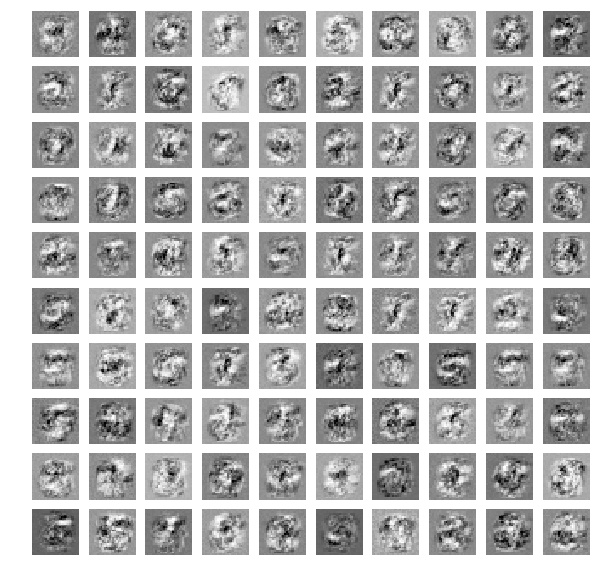

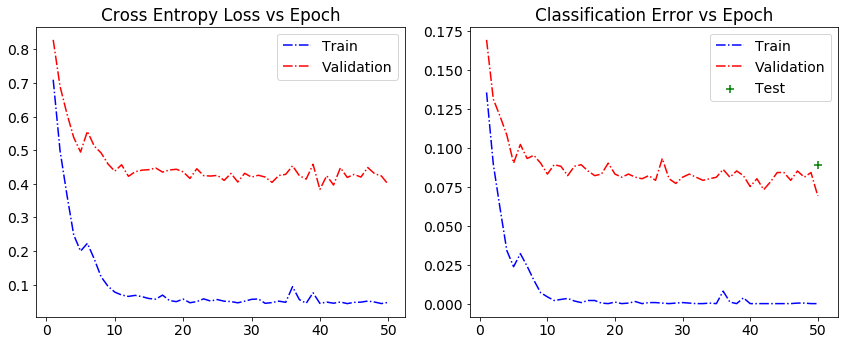

In [392]:
#-------------------------------Network Architecture-----------------------
n_hidden=1
input_layer_size=784
hidden_layer_size=[100]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)

# --------------- Initializing Parameters------------------------
nn_weight_list = []
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)
""" The parameters for the neural network are "unrolled" into the vector nn_params
and need to be converted back into the weight matrices"""
nnparams = Unroll_weights(nn_weight_list, layer_sizes)

#----------------------------- Hyper Parameters -----------------------
epochmax = 50
reg_lambda = 0.005
minibatchsize = 20 #Set =1 for regular stochastic gradient descent
LearningRate= 0.05
momentum = 0.1

# -------------------------Set Activation Function----------------------------
activ_func = sigmoid
activ_Grad_func = sigmoidGradient

# ---------------Training Network------------------------
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                      layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                      activ_Grad_func, X_train, Y_train, X_val, Y_val)
print "Epochs =", epochmax
activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
print "Test Performance is", 100.0*(1-mean_err),'%'

time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.savefig('Best1layerWeights.png',dpi = 200)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Cross Entropy Loss vs Epoch')

plt.subplot(122)
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Classification Error vs Epoch')
plt.tight_layout()
plt.show()

In [393]:
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

Train 0.0476343536297 0.0
Val 0.397972342238 0.069
Test 0.496856626234 0.0886666666667


## Look for Changing Number of Hidden units:

('epochmax:100', ' L2 Regularization: 0.000', ' Learning rate: 0.01', ' Layer Sizes', [784, 500, 10])
Epochs = 100
Test Performance is 90.6666666667 %


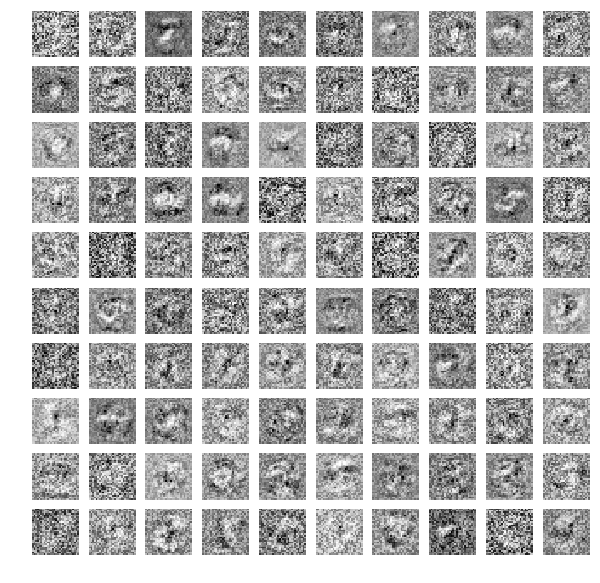

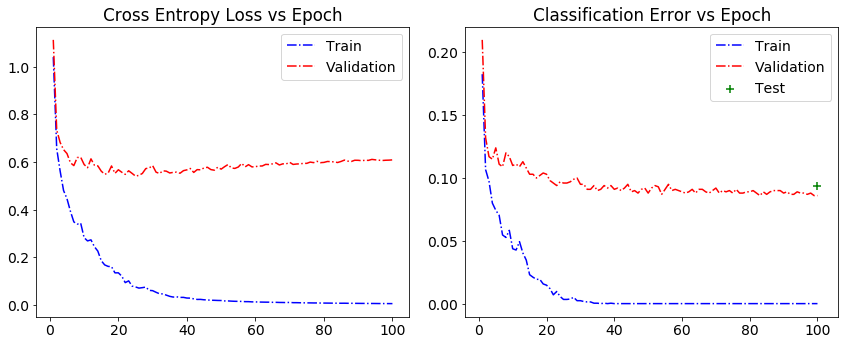

In [368]:
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Plotting Results------------------------
print "Epochs =", epochmax
activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
print "Test Performance is", 100.0*(1-mean_err),'%'

time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((500,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Cross Entropy Loss vs Epoch')

plt.subplot(122)
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Classification Error vs Epoch')
plt.tight_layout()
plt.show()

Plotting all 500 weights


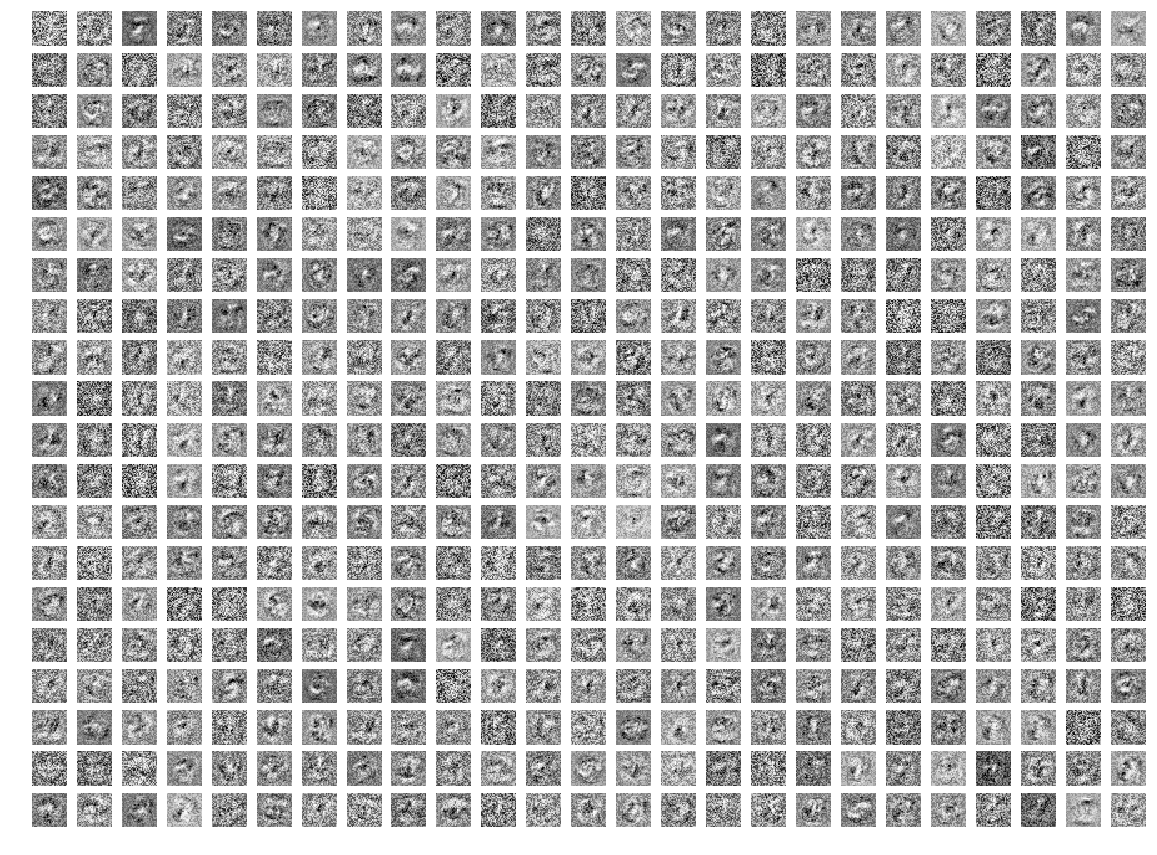

In [369]:
print "Plotting all 500 weights"
W = nn_weight_list[0][:,0:-1].reshape((500,28,28))
fig = plt.figure(figsize=(20,15))
for i in range(1,501):
    ax = plt.subplot(20,25,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.show()

#### df 
df contains the results of grid search for 1-layer network. In the next few steps, we analyze the results of gridsearch:
> Hint: Found Lots of dead units with 500 layers (bad training probably), hence choose 100 layers to get optimum parameters..

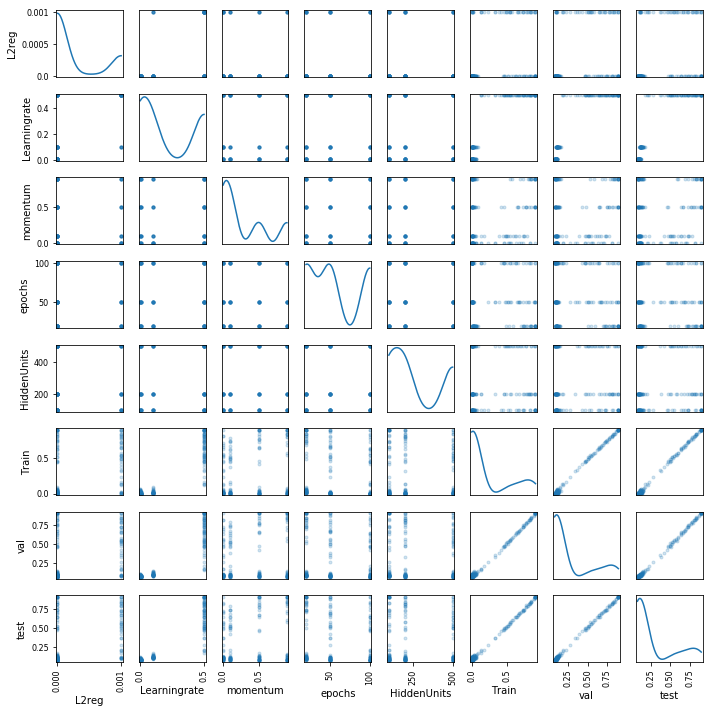

In [246]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.tight_layout()

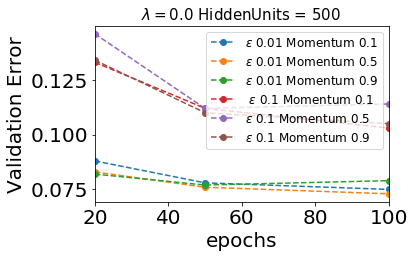

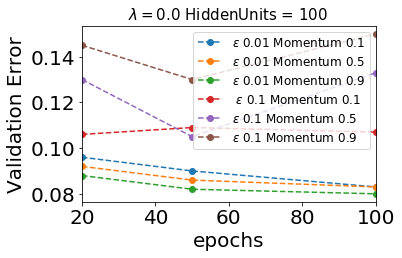

In [302]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure()
ax = plt.subplot(111)
df[(df['momentum']==0.1) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.5) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.9) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.1) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val','line', ax = ax,  style='--o')

df[(df['momentum']==0.5) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val','line', ax = ax,  style='--o')

df[(df['momentum']==0.9) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==500)].plot('epochs','val','line', ax = ax, style='--o')

plt.legend([ '$\epsilon$ 0.01 Momentum 0.1','$\epsilon$ 0.01 Momentum 0.5','$\epsilon$ 0.01 Momentum 0.9',
            ' $\epsilon$ 0.1 Momentum 0.1','$\epsilon$ 0.1 Momentum 0.5','$\epsilon$ 0.1 Momentum 0.9'],
           fontsize=12)
plt.ylabel('Validation Error')
plt.title('$\lambda = 0.0$ HiddenUnits = 500 ', fontsize = 15)
plt.tight_layout()
plt.savefig('SingleLayerIter2.png',dpi=200)

plt.figure()
ax = plt.subplot(111)
df[(df['momentum']==0.1) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.5) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.9) & (df['Learningrate']==0.01) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0.1) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val','line', ax = ax,  style='--o')

df[(df['momentum']==0.5) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val','line', ax = ax,  style='--o')

df[(df['momentum']==0.9) & (df['Learningrate']==0.1) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('epochs','val','line', ax = ax, style='--o')

plt.legend([ '$\epsilon$ 0.01 Momentum 0.1','$\epsilon$ 0.01 Momentum 0.5','$\epsilon$ 0.01 Momentum 0.9',
            ' $\epsilon$ 0.1 Momentum 0.1','$\epsilon$ 0.1 Momentum 0.5','$\epsilon$ 0.1 Momentum 0.9'],
          fontsize=12)
plt.ylabel('Validation Error')
plt.title('$\lambda = 0.0$ HiddenUnits = 100 ', fontsize = 15)
plt.tight_layout()
plt.savefig('SingleLayerIter3.png',dpi=200)


In [298]:
np.unique(df['momentum'])

array([ 0. ,  0.1,  0.5,  0.9])

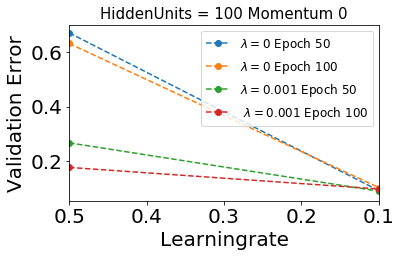

In [303]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure()
ax = plt.subplot(111)
df[(df['momentum']==0) & (df['epochs']==50) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0) & (df['epochs']==100) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val', 'line',ax=ax, style='--o')


df[(df['momentum']==0) & (df['epochs']==50) & (df['L2reg']==0.001) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val','line', ax = ax,  style='--o')

df[(df['momentum']==0) & (df['epochs']==100) & (df['L2reg']==0.001) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val','line', ax = ax,  style='--o')

plt.legend([ '$\lambda = 0$ Epoch 50','$\lambda = 0$ Epoch 100','$\lambda = 0.001$ Epoch 50',
            ' $\lambda = 0.001$ Epoch 100'],
          fontsize=12)
plt.ylabel('Validation Error')
#plt.xticks(rotation = 70)
plt.title('HiddenUnits = 100 Momentum 0', fontsize = 15)
plt.tight_layout()
plt.savefig('SingleLayerIter4.png',dpi=200)

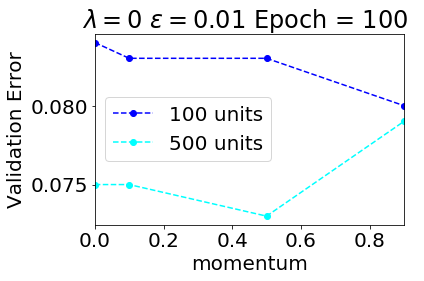

In [289]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.figure()
ax = plt.subplot(111)
df[(df['L2reg']==0) & (df['Learningrate']==0.01) & (df['epochs']==100) & 
   (df['HiddenUnits']==100)].plot('momentum','val', 'line',ax=ax,c='blue', style='--o')

df[(df['L2reg']==0) & (df['Learningrate']==0.01) & (df['epochs']==100) & 
   (df['HiddenUnits']==500)].plot('momentum','val','line', ax = ax, c='cyan', style='--o')
plt.legend(['100 units','500 units'])
plt.tight_layout()
plt.ylabel('Validation Error')
plt.title('$\lambda = 0$ $\epsilon = 0.01$ Epoch = 100  ')

In [59]:
df.groupby(by=['L2reg','Learningrate','momentum','epochs','HiddenUnits']).mean()

Train    val      test
L2reg Learningrate momentum epochs HiddenUnits                           
0.000 0.005        0.0      20     100          0.055667  0.109  0.115667
                                   200          0.054333  0.106  0.115667
                                   500          0.065667  0.107  0.129333
                            50     100          0.014667  0.096  0.097000
                                   200          0.012333  0.093  0.098000
                                   500          0.019667  0.100  0.105667
                            100    100          0.001333  0.084  0.093000
                                   200          0.000667  0.079  0.091000
                                   500          0.000667  0.076  0.096000
                   0.1      20     100          0.053000  0.107  0.114333
                                   200          0.050333  0.104  0.113667
                                   500          0.062333  0.107  0.126667
                            50     100          0.012000  0.093  0.096000
                                   200          0.011333  0.090  0.095333
                                   500          0.015000  0.094  0.101333
                            100    100          0.000333  0.086  0.092667
                                   200          0.000000  0.078  0.090667
                                   500          0.000333  0.079  0.094333
                   0.5      20     100          0.037000  0.100  0.108667
                                   200          0.037000  0.096  0.106667
                                   500          0.046333  0.097  0.115667
                            50     100          0.005667  0.088  0.094000
                                   200          0.003333  0.082  0.092333
                                   500          0.005667  0.088  0.096333
                            100    100          0.000000  0.085  0.090667
                                   200          0.000000  0.074  0.088000
                                   500          0.000000  0.076  0.090000
                   0.9      20     100          0.027333  0.100  0.106333
                                   200          0.026333  0.090  0.099000
                                   500          0.032000  0.089  0.108000
...                                                  ...    ...       ...
0.001 0.500        0.0      100    100          0.124667  0.177  0.218667
                                   200          0.137333  0.180  0.203333
                                   500          0.547000  0.552  0.571000
                   0.1      20     100          0.722000  0.728  0.733333
                                   200          0.782667  0.784  0.778000
                                   500          0.483667  0.512  0.498667
                            50     100          0.534667  0.549  0.555667
                                   200          0.489333  0.505  0.513333
                                   500          0.378667  0.387  0.417667
                            100    100          0.169333  0.219  0.221667
                                   200          0.136000  0.169  0.178333
                                   500          0.502333  0.524  0.530667
                   0.5      20     100          0.900000  0.900  0.900000
                                   200          0.900333  0.901  0.900333
                                   500          0.772333  0.782  0.793333
                            50     100          0.653667  0.655  0.669667
                                   200          0.878333  0.871  0.875667
                                   500          0.639333  0.661  0.638000
                            100    100          0.413667  0.424  0.458667
                                   200          0.459000  0.483  0.477667
                                   500          0.648667  0.647  0.667000
                   0.9      20     100          0.90000

# Grid Search for 2-layer Neural Net params:

In [378]:
L2reg = [0.005,0.01]
learning_rates = [0.1, 0.01]
momentums = [0, 0.1, 0.5, 0.9]
epochs=[20,50,100]
hidden_units = [100,200]
len(list(itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units)))

96

In [144]:
L2reg = [0.005,0.01]
learning_rates = [0.1, 0.01]
momentums = [0, 0.1, 0.5, 0.9]
epochs=[20,50,100]
hidden_units = [100,200]
minibatchsize = 32 #Set =1 for regular stochastic gradient descent
train_err2layer= []
val_err2layer = []
test_err2layer=[]
for combination in itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units):
    reg_lambda, LearningRate, momentum, epochmax, h = combination
    # --------------- Initializing Params------------------------
    n_hidden=2
    input_layer_size=784
    hidden_layer_size=[h,h]
    num_labels = 10
    layer_sizes=[input_layer_size]
    layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
    layer_sizes.append(num_labels)
    # Initialize weights for all the layers:
    nn_weight_list = []
    for i in range(len(layer_sizes)-1):
        L_in = layer_sizes[i]
        L_out = layer_sizes[i+1]
        np.random.seed(0)
        W = randInitializeWeights(L_in, L_out) #(100, 785)
        nn_weight_list.append(W)
    """ The parameters for the neural network are "unrolled" into the vector nn_params
    and need to be converted back into the weight matrices"""
    nnparams = Unroll_weights(nn_weight_list, layer_sizes)
    # ---------------Training Network------------------------
    activ_func = sigmoid
    activ_Grad_func = sigmoidGradient
    train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                          layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                          activ_Grad_func, X_train, Y_train, X_val, Y_val)
    train_err2layer.append(err_tr[-1])
    val_err2layer.append(err_val[-1])
    #Final_params2layer.append(nn_weight_list)
    activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
    output_p = activation_test[-1]
    mean_err = Mean_classification_error(Y_test,output_p)
    test_err2layer.append(mean_err)

In [304]:
len(test_err2layer)

96

In [305]:
L2reg = [0.005,0.01]
learning_rates = [0.1, 0.01]
momentums = [0, 0.1, 0.5, 0.9]
epochs=[20,50,100]
hidden_units = [100,200]
combinations = list(itertools.product(L2reg, learning_rates, momentums, epochs, hidden_units))
print len(combinations)
weight_decays = [x[0] for x in combinations]
learning_rates = [x[1] for x in combinations]
momentums = [x[2] for x in combinations]
epochs = [x[3] for x in combinations]
hidden_units = [x[4] for x in combinations]
df=pd.DataFrame()
df['L2reg'] = weight_decays
df['Learningrate'] = learning_rates
df['momentum'] = momentums
df['epochs'] = epochs
df['HiddenUnits'] = hidden_units
df['Train'] =train_err2layer
df['val'] = val_err2layer
df['test'] = test_err2layer
df.head()

96


L2reg  Learningrate  momentum  epochs  HiddenUnits     Train    val  \
0  0.005           0.1         0      20          100  0.001333  0.069   
1  0.005           0.1         0      20          200  0.009000  0.081   
2  0.005           0.1         0      50          100  0.000000  0.068   
3  0.005           0.1         0      50          200  0.000667  0.063   
4  0.005           0.1         0     100          100  0.000000  0.068   

       test  
0  0.081000  
1  0.091000  
2  0.079000  
3  0.079667  
4  0.076333

In [149]:
df.groupby(by=['L2reg','Learningrate','momentum','epochs','HiddenUnits']).mean()

Train    val      test
L2reg Learningrate momentum epochs HiddenUnits                           
0.005 0.01         0.0      20     100          0.035333  0.095  0.103667
                                   200          0.032333  0.097  0.109000
                            50     100          0.000333  0.077  0.084667
                                   200          0.001667  0.080  0.091667
                            100    100          0.000000  0.076  0.085667
                                   200          0.000000  0.073  0.085000
                   0.1      20     100          0.030333  0.093  0.103000
                                   200          0.028667  0.094  0.106000
                            50     100          0.000333  0.077  0.084333
                                   200          0.000667  0.080  0.090000
                            100    100          0.000000  0.072  0.084667
                                   200          0.000000  0.072  0.085333
                   0.5      20     100          0.026667  0.091  0.101000
                                   200          0.019667  0.094  0.108000
                            50     100          0.000000  0.076  0.082667
                                   200          0.000000  0.078  0.087667
                            100    100          0.000000  0.068  0.080667
                                   200          0.000000  0.074  0.084333
                   0.9      20     100          0.019000  0.088  0.104667
                                   200          0.011667  0.091  0.104667
                            50     100          0.000000  0.074  0.083333
                                   200          0.000000  0.074  0.085333
                            100    100          0.000000  0.069  0.080000
                                   200          0.000000  0.070  0.084000
      0.10         0.0      20     100          0.001333  0.069  0.081000
                                   200          0.009000  0.081  0.091000
                            50     100          0.000000  0.068  0.079000
                                   200          0.000667  0.063  0.079667
                            100    100          0.000000  0.068  0.076333
                                   200          0.000333  0.060  0.074000
...                                                  ...    ...       ...
0.010 0.01         0.9      20     100          0.026667  0.091  0.106667
                                   200          0.016000  0.092  0.106000
                            50     100          0.000000  0.074  0.085000
                                   200          0.000333  0.074  0.085333
                            100    100          0.000000  0.070  0.080667
                                   200          0.000000  0.069  0.083000
      0.10         0.0      20     100          0.012667  0.087  0.093667
                                   200          0.108000  0.180  0.186667
                            50     100          0.031667  0.092  0.117000
                                   200          0.118000  0.180  0.198333
                            100    100          0.010667  0.076  0.088333
                                   200          0.001667  0.065  0.077667
                   0.1      20     100          0.039000  0.107  0.128667
                                   200          0.028000  0.101  0.122000
                            50     100          0.020667  0.074  0.101000
                                   200          0.025333  0.099  0.122667
                            100    100          0.002667  0.074  0.081667
                                   200          0.001667  0.066  0.074333
                   0.5      20     100          0.040667  0.097  0.107333
                                   200          0.046667  0.109  0.125667
                            50     100          0.017667  0.083  0.090000
                                   200          0.13766

In [150]:
df[['Train','val','test']].min()

Train    0.000
val      0.050
test     0.073
dtype: float64

In [157]:
df[(df['val']<=0.052)]

L2reg  Learningrate  momentum  epochs  HiddenUnits  Train   val   test
8  0.005           0.1       0.1      50          100      0  0.05  0.073

In [313]:
np.unique(df['Learningrate'])

array([ 0.01,  0.1 ])

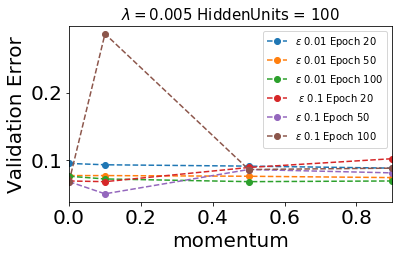

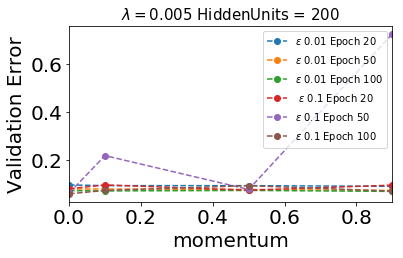

In [339]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure()
ax = plt.subplot(111)
df[(df['epochs']==20) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==50) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==100) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==20) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val','line', ax = ax,  style='--o')

df[(df['epochs']==50) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val','line', ax = ax,  style='--o')

df[(df['epochs']==100) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==100)].plot('momentum','val','line', ax = ax, style='--o')

plt.legend([ '$\epsilon$ 0.01 Epoch 20','$\epsilon$ 0.01 Epoch 50','$\epsilon$ 0.01 Epoch 100',
            ' $\epsilon$ 0.1 Epoch 20','$\epsilon$ 0.1 Epoch 50','$\epsilon$ 0.1 Epoch 100'],
           fontsize=10, loc='upper right')
plt.ylabel('Validation Error')
plt.title('$\lambda = 0.005$ HiddenUnits = 100 ', fontsize = 15)
plt.tight_layout()
plt.savefig('TwoLayerIter1.png',dpi=200)

plt.figure()
ax = plt.subplot(111)
df[(df['epochs']==20) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==50) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==100) & (df['Learningrate']==0.01) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val', 'line',ax=ax, style='--o')

df[(df['epochs']==20) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val','line', ax = ax,  style='--o')

df[(df['epochs']==50) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val','line', ax = ax,  style='--o')

df[(df['epochs']==100) & (df['Learningrate']==0.1) & (df['L2reg']==0.005) & 
   (df['HiddenUnits']==200)].plot('momentum','val','line', ax = ax, style='--o')

plt.legend([ '$\epsilon$ 0.01 Epoch 20','$\epsilon$ 0.01 Epoch 50','$\epsilon$ 0.01 Epoch 100',
            ' $\epsilon$ 0.1 Epoch 20','$\epsilon$ 0.1 Epoch 50','$\epsilon$ 0.1 Epoch 100'],
           fontsize=10, loc='upper right')
plt.ylabel('Validation Error')
plt.title('$\lambda = 0.005$ HiddenUnits = 200 ', fontsize = 15)
plt.tight_layout()
plt.savefig('TwoLayerIter2.png',dpi=200)


In [ ]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure()
ax = plt.subplot(111)
df[(df['momentum']==0) & (df['epochs']==50) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val', 'line',ax=ax, style='--o')

df[(df['momentum']==0) & (df['epochs']==100) & (df['L2reg']==0) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val', 'line',ax=ax, style='--o')


df[(df['momentum']==0) & (df['epochs']==50) & (df['L2reg']==0.001) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val','line', ax = ax,  style='--o')

df[(df['momentum']==0) & (df['epochs']==100) & (df['L2reg']==0.001) & 
   (df['HiddenUnits']==100)].plot('Learningrate','val','line', ax = ax,  style='--o')

plt.legend([ '$\lambda = 0$ Epoch 50','$\lambda = 0$ Epoch 100','$\lambda = 0.001$ Epoch 50',
            ' $\lambda = 0.001$ Epoch 100'],
          fontsize=12)
plt.ylabel('Validation Error')
#plt.xticks(rotation = 70)
plt.title('HiddenUnits = 100 Momentum 0', fontsize = 15)
plt.tight_layout()
#plt.savefig('SingleLayerIter4.png',dpi=200)

In [345]:
df[df['val'] < 0.051]

L2reg  Learningrate  momentum  epochs  HiddenUnits  Train   val   test
8  0.005           0.1       0.1      50          100      0  0.05  0.073

# Best parameters for 2 Hidden Layer Network :

Time 0
Cross Entropy 	 Training:  2.36348567603 	 Validation:  2.39154377484
Mean  Error : 	 Training:  0.609333333333 	 Validation: 0.62
Time 10
Cross Entropy 	 Training:  0.153576867026 	 Validation:  0.537333263371
Mean  Error : 	 Training:  0.0203333333333 	 Validation: 0.094
Time 20
Cross Entropy 	 Training:  0.0348287397162 	 Validation:  0.460484609502
Mean  Error : 	 Training:  0.000666666666667 	 Validation: 0.087
Time 30
Cross Entropy 	 Training:  0.0238245615068 	 Validation:  0.429029526938
Mean  Error : 	 Training:  0.0 	 Validation: 0.077
Time 40
Cross Entropy 	 Training:  0.0223937471727 	 Validation:  0.420463993517
Mean  Error : 	 Training:  0.0 	 Validation: 0.074
Time 50
Cross Entropy 	 Training:  0.02053118596 	 Validation:  0.414140033944
Mean  Error : 	 Training:  0.0 	 Validation: 0.078
Time 60
Cross Entropy 	 Training:  0.0198090749207 	 Validation:  0.41597686764
Mean  Error : 	 Training:  0.0 	 Validation: 0.075
Time 70
Cross Entropy 	 Training:  0.01935706805

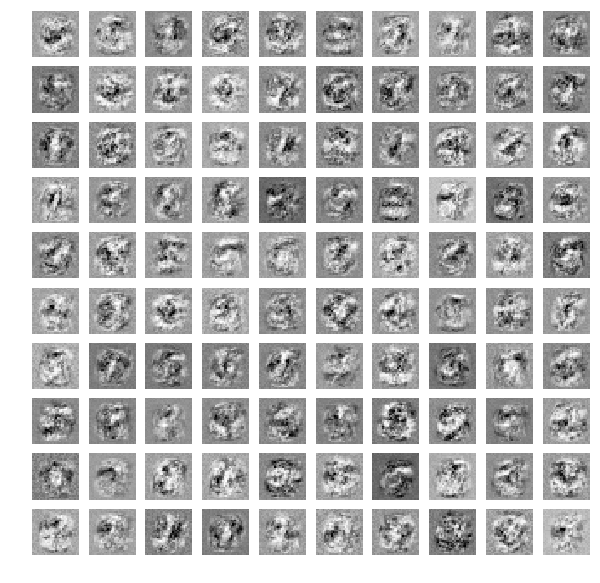

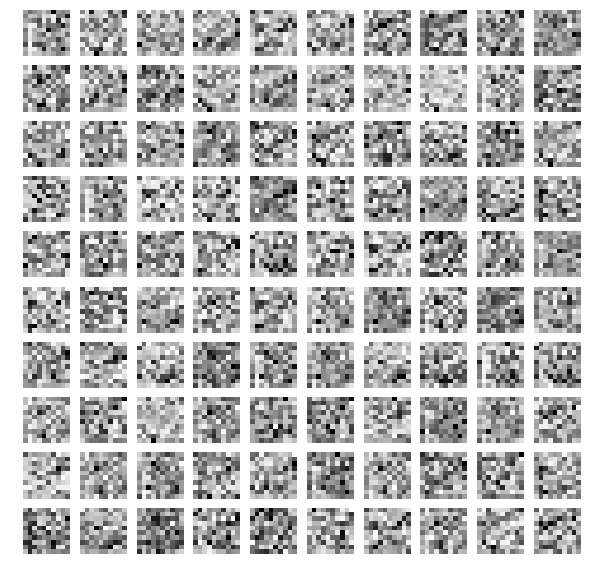

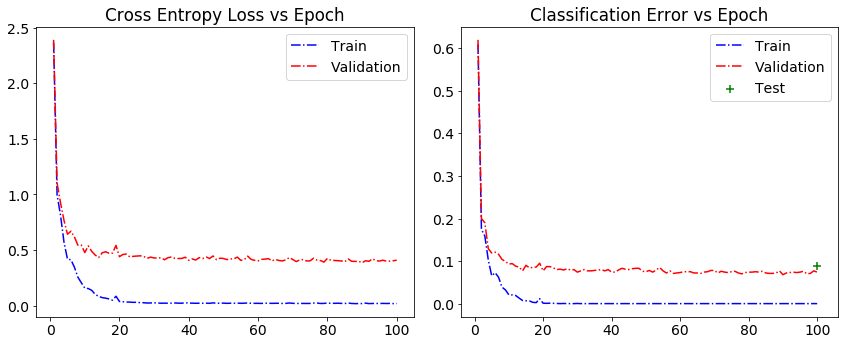

In [408]:
reg_lambda = 0.005
LearningRate = 0.02 
momentum= 0.9 
epochmax =100 
minibatchsize=40
h = 100
activ_func = sigmoid
activ_Grad_func = sigmoidGradient
# --------------- Initializing Params------------------------
n_hidden=2
input_layer_size=784
hidden_layer_size=[h,h]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)
# Initialize weights for all the layers:
nn_weight_list = []
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)
""" The parameters for the neural network are "unrolled" into the vector nn_params
and need to be converted back into the weight matrices"""
nnparams = Unroll_weights(nn_weight_list, layer_sizes)
# ---------------Training Network------------------------
activ_func = sigmoid
activ_Grad_func = sigmoidGradient
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, 
                                                                      layer_sizes, minibatchsize, momentum,  activ_func, 
                                                                      activ_Grad_func, X_train, Y_train, X_val, Y_val)

print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

# ---------------Plotting Results------------------------
print "Test Performance is", 100.0*(1-mean_err),'%'

time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
plt.savefig('Best2layerWeights_1.png',dpi = 200)
plt.show()

fig = plt.figure(figsize=(10,10))
W = nn_weight_list[1][:,0:-1].reshape((100,10,10))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
#plt.savefig('Best2layerWeights_2.png',dpi = 200)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Cross Entropy Loss vs Epoch')

plt.subplot(122)
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Classification Error vs Epoch')
plt.tight_layout()
plt.show()